In [99]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
# Loading the data

all_data_df = pd.read_excel('alldata.xlsx')

dr_responses_df = pd.read_excel('drdata.xlsx')
dr_questions_df = pd.read_excel('drq.xlsx')

tv2_responses_df = pd.read_excel('tv2data.xlsx')
tv2_questions_df = pd.read_excel('tv2q.xlsx')

elected_candidates_responses_df = pd.read_excel('electeddata.xlsx')

# Exploring data

In [101]:
all_data_df

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,1,-2,2,-1,1,-2,1,1,...,1,2,-1,2,1,-2,0,0,Københavns Omegns Storkreds,33
863,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,-1,0,-1,2,2,-2,0,0,Københavns Omegns Storkreds,45
864,1,1,1,-2,2,-1,1,-1,-1,1,...,-1,0,-1,2,2,-2,0,1,Københavns Omegns Storkreds,52
865,1,-1,1,-2,1,-1,-1,-1,-1,1,...,0,0,0,2,1,-2,1,0,Københavns Omegns Storkreds,44


In [102]:
dr_questions_df.head()

,ID,Title,Question,Info,ArgumentFor,ArgumentAgainst,WordMerger,ID_CandidateQuestionType,Rule,QuestionListData
0,530,KLIMA OG ENERGI,Danmark skal bruge flere penge på at styrke to...,NaN,Den kollektive trafik bør være billig og tilgæ...,Det er dyrt for statskassen at opretholde drif...,0,1,FT,NaN
1,531,ARBEJDSMARKED OG ØKONOMI,Der skal indføres en særlig skat på de allerhø...,NaN,Historisk rammer kriser de fattigste hårdest. ...,Det danske samfund er et af de mest lige samfu...,0,1,FT,NaN
2,533,RET OG STRAF,Kriminalitet begået i udsatte boligområder ska...,NaN,Den mest effektive måde at stoppe bandekrimina...,"Det er urimeligt, at den samme forbrydelse ska...",0,1,FT,NaN
3,534,EU OG UDENRIGS,På sigt skal Danmark meldes ud af EU,NaN,"Så længe Danmark er medlem af EU, kan flertall...",Danmark er bedst tjent med at være en del af E...,0,1,FT,NaN
4,535,EU OG UDENRIGS,"Det er fornuftigt, at Danmark i de kommende år...",NaN,Ruslands angreb på Ukraine har ændret alting o...,Vi er medlemmer af Nato og har i forvejen et s...,0,1,FT,NaN


In [103]:
dr_responses_df.head()

,530,531,533,534,535,537,538,540,541,543,...,552,553,555,556,557,559,561,563,navn,parti
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,-2,2,2,1,2,2,-2,Lars Philipsen Prahm,Moderaterne
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,1,1,-1,-2,1,2,1,2,Karsten Hønge,Socialistisk Folkeparti
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,2,-1,-2,-1,1,2,2,2,Martin Kelleher-Petersen,Alternativet
3,2,1,-2,-1,1,1,1,1,1,-2,...,2,1,2,-2,2,2,2,2,Nicklas Gjedsig Larsen,Alternativet
4,1,1,-2,2,-2,1,-2,1,2,-2,...,2,-2,-2,-1,1,-2,-1,-2,Tom Gillesberg,Løsgænger


In [104]:
tv2_questions_df.head()

,id,type,header,question,depends
0,bornholm-1,rate,Bornholms Storkreds,Med særligt attraktive vilkår bør staten sikre...,{'selectedArea': 'bornholms storkreds'}
1,bornholm-2,rate,Bornholms Storkreds,"Staten bør sørge for, at flytrafikken til og f...",{'selectedArea': 'bornholms storkreds'}
2,bornholm-3,rate,Bornholms Storkreds,Der skal sættes flere penge af til Forsvarets ...,{'selectedArea': 'bornholms storkreds'}
3,bornholm-4,rate,Bornholms Storkreds,Det skal være lettere at hente udenlandsk arbe...,{'selectedArea': 'bornholms storkreds'}
4,bornholm-5,rate,Bornholms Storkreds,Beslutningen om at etablere en naturnationalpa...,{'selectedArea': 'bornholms storkreds'}


In [105]:
tv2_responses_df.head()

,1a,1b,2a,2b,3a,3b,4a,4b,5a,5b,...,10a,10b,11a,11b,12a,12b,parti,navn,storkreds,alder
0,0,1,1,1,1,-1,0,1,0,0,...,0,2,-1,2,0,0,Venstre,Birthe Tindbæk Bredo,Bornholms Storkreds,63
1,-1,1,0,-1,2,-2,-1,-1,-2,1,...,1,-1,-1,2,1,-1,Venstre,Julie Pauch Nymark,Bornholms Storkreds,27
2,-2,0,0,1,1,-1,0,1,-1,1,...,1,1,-2,2,1,1,Venstre,Peter Juel-Jensen,Bornholms Storkreds,56
3,-2,-1,2,2,2,-2,0,-1,-2,1,...,1,-1,-2,2,2,-2,Dansk Folkeparti,Mette Sode Hansen,Bornholms Storkreds,42
4,-2,-1,1,1,2,-2,1,0,-1,1,...,2,1,-1,2,0,1,Dansk Folkeparti,René Danielsson,Bornholms Storkreds,35


In [106]:
elected_candidates_responses_df.head()

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
1,2,2,-2,-2,-2,-2,2,2,2,-2,...,-2,0,-2,2,1,1,0,-2,Østjyllands Storkreds,58
2,2,2,-2,-1,-1,-1,1,-2,2,-2,...,-2,0,-1,2,0,-2,-1,1,Østjyllands Storkreds,30
3,-1,-1,2,-1,2,-1,-2,1,-2,1,...,-1,-1,0,2,-2,2,0,0,Østjyllands Storkreds,53
4,-1,-1,1,-2,2,1,-2,1,-2,1,...,-1,0,1,1,-2,2,1,-1,Østjyllands Storkreds,46


In [107]:
from pandas.io.formats.info import DataFrameInfo
def get_missing_ratio_info(df: pd.DataFrame) -> pd.DataFrame: 
    info = DataFrameInfo(data = df)
    row_count = df.shape[0]
    info_df = pd.DataFrame(
        {'Non-Null Count': info.non_null_counts, 'Dtype': info.dtypes}
    )

    # Calculating missing data per column. 
    info_df['Missing Count'] = row_count - info_df['Non-Null Count']
    info_df['Missing Ratio'] = (info_df['Missing Count'] / row_count).astype(float)
    return info_df

In [108]:
print(f"rows {all_data_df.shape[0]}, cols {all_data_df.shape[1]}")
all_data_missing_info = get_missing_ratio_info(all_data_df)
print(all_data_missing_info.sort_values(by=['Non-Null Count'], ascending=True))

rows 867, cols 53
           Non-Null Count   Dtype  Missing Count  Missing Ratio
530                   867   int64              0            0.0
1b                    867   int64              0            0.0
2a                    867   int64              0            0.0
2b                    867   int64              0            0.0
3a                    867   int64              0            0.0
3b                    867   int64              0            0.0
4a                    867   int64              0            0.0
4b                    867   int64              0            0.0
5a                    867   int64              0            0.0
5b                    867   int64              0            0.0
6a                    867   int64              0            0.0
6b                    867   int64              0            0.0
7a                    867   int64              0            0.0
7b                    867   int64              0            0.0
8a                    

In [109]:
tv2_missing_info = get_missing_ratio_info(tv2_responses_df)
print(tv2_missing_info.sort_values(by=['Non-Null Count'], ascending=True))

           Non-Null Count   Dtype  Missing Count  Missing Ratio
1a                    962   int64              0            0.0
navn                  962  object              0            0.0
parti                 962  object              0            0.0
12b                   962   int64              0            0.0
12a                   962   int64              0            0.0
11b                   962   int64              0            0.0
11a                   962   int64              0            0.0
10b                   962   int64              0            0.0
10a                   962   int64              0            0.0
9b                    962   int64              0            0.0
9a                    962   int64              0            0.0
8b                    962   int64              0            0.0
8a                    962   int64              0            0.0
7b                    962   int64              0            0.0
7a                    962   int64       

In [110]:
dr_missing_info = get_missing_ratio_info(dr_responses_df)
print(dr_missing_info.sort_values(by=['Non-Null Count'], ascending=True))


       Non-Null Count   Dtype  Missing Count  Missing Ratio
530               904   int64              0            0.0
563               904   int64              0            0.0
561               904   int64              0            0.0
559               904   int64              0            0.0
557               904   int64              0            0.0
556               904   int64              0            0.0
555               904   int64              0            0.0
553               904   int64              0            0.0
552               904   int64              0            0.0
551               904   int64              0            0.0
550               904   int64              0            0.0
548               904   int64              0            0.0
navn              904  object              0            0.0
547               904   int64              0            0.0
545               904   int64              0            0.0
544               904   int64           

In [111]:
dr_responses_df.head()

,530,531,533,534,535,537,538,540,541,543,...,552,553,555,556,557,559,561,563,navn,parti
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,-2,2,2,1,2,2,-2,Lars Philipsen Prahm,Moderaterne
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,1,1,-1,-2,1,2,1,2,Karsten Hønge,Socialistisk Folkeparti
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,2,-1,-2,-1,1,2,2,2,Martin Kelleher-Petersen,Alternativet
3,2,1,-2,-1,1,1,1,1,1,-2,...,2,1,2,-2,2,2,2,2,Nicklas Gjedsig Larsen,Alternativet
4,1,1,-2,2,-2,1,-2,1,2,-2,...,2,-2,-2,-1,1,-2,-1,-2,Tom Gillesberg,Løsgænger


In [112]:
tv2_questions_df.head()

,id,type,header,question,depends
0,bornholm-1,rate,Bornholms Storkreds,Med særligt attraktive vilkår bør staten sikre...,{'selectedArea': 'bornholms storkreds'}
1,bornholm-2,rate,Bornholms Storkreds,"Staten bør sørge for, at flytrafikken til og f...",{'selectedArea': 'bornholms storkreds'}
2,bornholm-3,rate,Bornholms Storkreds,Der skal sættes flere penge af til Forsvarets ...,{'selectedArea': 'bornholms storkreds'}
3,bornholm-4,rate,Bornholms Storkreds,Det skal være lettere at hente udenlandsk arbe...,{'selectedArea': 'bornholms storkreds'}
4,bornholm-5,rate,Bornholms Storkreds,Beslutningen om at etablere en naturnationalpa...,{'selectedArea': 'bornholms storkreds'}


In [113]:
tv2_responses_df.head()

,1a,1b,2a,2b,3a,3b,4a,4b,5a,5b,...,10a,10b,11a,11b,12a,12b,parti,navn,storkreds,alder
0,0,1,1,1,1,-1,0,1,0,0,...,0,2,-1,2,0,0,Venstre,Birthe Tindbæk Bredo,Bornholms Storkreds,63
1,-1,1,0,-1,2,-2,-1,-1,-2,1,...,1,-1,-1,2,1,-1,Venstre,Julie Pauch Nymark,Bornholms Storkreds,27
2,-2,0,0,1,1,-1,0,1,-1,1,...,1,1,-2,2,1,1,Venstre,Peter Juel-Jensen,Bornholms Storkreds,56
3,-2,-1,2,2,2,-2,0,-1,-2,1,...,1,-1,-2,2,2,-2,Dansk Folkeparti,Mette Sode Hansen,Bornholms Storkreds,42
4,-2,-1,1,1,2,-2,1,0,-1,1,...,2,1,-1,2,0,1,Dansk Folkeparti,René Danielsson,Bornholms Storkreds,35


In [114]:
elected_candidates_responses_df.head()

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
1,2,2,-2,-2,-2,-2,2,2,2,-2,...,-2,0,-2,2,1,1,0,-2,Østjyllands Storkreds,58
2,2,2,-2,-1,-1,-1,1,-2,2,-2,...,-2,0,-1,2,0,-2,-1,1,Østjyllands Storkreds,30
3,-1,-1,2,-1,2,-1,-2,1,-2,1,...,-1,-1,0,2,-2,2,0,0,Østjyllands Storkreds,53
4,-1,-1,1,-2,2,1,-2,1,-2,1,...,-1,0,1,1,-2,2,1,-1,Østjyllands Storkreds,46


We did not find any missing values in any data set

In [115]:
all_data_df

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,1,-2,2,-1,1,-2,1,1,...,1,2,-1,2,1,-2,0,0,Københavns Omegns Storkreds,33
863,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,-1,0,-1,2,2,-2,0,0,Københavns Omegns Storkreds,45
864,1,1,1,-2,2,-1,1,-1,-1,1,...,-1,0,-1,2,2,-2,0,1,Københavns Omegns Storkreds,52
865,1,-1,1,-2,1,-1,-1,-1,-1,1,...,0,0,0,2,1,-2,1,0,Københavns Omegns Storkreds,44


# PCA

In [116]:
all_data_df.value_counts()

530  531  533  534  535  537  538  540  541  543  544  545  546  547  548  550  551  552  553  555  556  557  559  561  563  navn               parti                                        1a  1b  2a  2b  3a  3b  4a  4b  5a  5b  6a  6b  7a  7b  8a  8b  9a  9b  10a  10b  11a  11b  12a  12b  storkreds                alder
-2   -2   -2   -2    1    2   -2    1   -2    2   -2    2    2   -2    1   -2   -2    1   -2    2    2   -1    1    2   -2   Kenneth Kirkeby    Liberal Alliance                              0  -1  0    1   1  -2  -1  -2   1  -1   1   1   2   1   1  -1   2  -1   2   -2   -2    2   2    -1   Sydjyllands Storkreds    34       1
 1    2   -1   -2    1   -1    1   -1    1    1   -2    1   -1    1    1    2   -2    2   -1    1   -2    2   -2   -1    1   Lone Larsen        Socialdemokratiet                             1   1  0    0   1   1   1   0   0   0   0   0  -1   1   1   1   1   0  -1    2    1   -2   0     1   Københavns Storkreds     69       1
      1    2   -1    1  

In [117]:
def onehotencode_and_concat_to_original(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    result = pd.concat([original_dataframe, dummies], axis=1)
    result = result.drop([feature_to_encode], axis=1)
    return(result) 

In [118]:
from sklearn.decomposition import PCA

def encode_party_names(all_data_df: pd.DataFrame):
    party_to_encoding_map = {}
    for index, parti in enumerate(all_data_df['parti'].unique()):
        party_to_encoding_map[parti] = index
    return party_to_encoding_map

party_to_encoding_map = encode_party_names(all_data_df)

def get_X_y(all_data_df):
    X = all_data_df.drop(['parti', 'navn'], inplace=False, axis=1)
    y = all_data_df['parti'].apply(lambda x: party_to_encoding_map[x])
    return X,y

X,y = get_X_y(all_data_df)
pca = PCA(n_components=0.95, random_state=4242)
X_decomposed = pca.fit_transform(onehotencode_and_concat_to_original(X, "storkreds"))

In [119]:
pca.explained_variance_ratio_

array([0.68092029, 0.14435069, 0.03484073, 0.01590748, 0.01024004,
       0.00879178, 0.00671333, 0.0058178 , 0.00483302, 0.00452836,
       0.00433605, 0.00396063, 0.00384681, 0.00359667, 0.00337015,
       0.00316751, 0.0030596 , 0.00297009, 0.00281441, 0.00260198])

In [120]:
pca.components_[0]

array([ 9.59415157e-03,  9.94638752e-03, -1.38876352e-02,  7.03525818e-05,
       -1.23451236e-02, -4.24119629e-04,  8.27818234e-03, -7.21829886e-03,
        1.34608803e-02, -7.98126127e-03,  1.93333741e-02, -9.39253193e-04,
        2.02022093e-03, -5.95041238e-03, -3.61568468e-05,  5.17927363e-03,
       -9.38656947e-03,  5.90776533e-03, -1.58067696e-02, -1.14282374e-02,
        2.66666056e-03,  3.90434835e-03,  4.61412794e-03,  1.68766078e-02,
        5.20517263e-03,  9.87965262e-03,  9.11516096e-03,  4.18881812e-03,
       -9.88349671e-03, -1.03588505e-02,  5.58667036e-03, -4.88114071e-04,
        6.99106742e-04,  2.27037159e-03, -3.31906271e-03,  1.15341758e-02,
       -1.08997105e-02,  4.48342423e-03, -1.67713813e-03,  6.09171678e-03,
        2.75682160e-03, -5.27142097e-03,  5.65475121e-03, -2.44649063e-03,
       -4.65296912e-03,  2.94266966e-03, -1.53912398e-03, -2.32535662e-03,
       -4.89870844e-03, -9.98445361e-01, -1.47569543e-04,  1.44894126e-03,
        4.69417073e-04,  

In [121]:
y

0       0
1       1
2       2
3       2
4       3
       ..
862    14
863    14
864    14
865    14
866    14
Name: parti, Length: 867, dtype: int64

In [122]:
X_decomposed[:,0]

array([-3.42447515e+01, -1.97995060e+01,  7.15563411e+00,  1.60640139e+01,
       -1.39534165e+01, -3.82085635e+00,  1.89940786e+01, -2.75342494e+00,
       -2.01915083e+00, -1.08343582e+01, -3.84515634e+00, -1.18339291e+01,
       -1.27229387e+01,  4.41824233e+01, -7.80886941e+00,  2.31879008e+01,
        2.32684555e+01, -1.37079510e+01,  2.32235798e+01,  2.52105934e+01,
        1.62890154e+01, -1.57116216e+01, -2.36935195e+01,  9.31083574e+00,
        1.10995530e+01,  1.42700623e+01, -4.39592152e+00,  2.52798955e+01,
       -1.65040607e+01, -1.34617629e+01, -9.45079297e+00, -4.98019965e-01,
        2.73101920e+00, -1.91861824e+01, -2.39480868e+00,  2.67069760e+00,
        1.37250394e+01, -8.37478772e+00, -2.49953200e+00, -2.87109587e-01,
       -5.33438324e+00, -6.33957825e+00,  1.70878503e+01,  1.12490996e+01,
        1.12794728e+01,  2.25620487e+00, -2.24874802e+01,  1.55680676e+01,
       -2.69352864e+00,  8.53328141e+00, -3.87725386e-01, -1.23576857e+01,
        2.25961722e+01, -

In [123]:
# Party to y value mappings
party_to_encoding_map

{'Moderaterne': 0,
 'Socialistisk Folkeparti': 1,
 'Alternativet': 2,
 'Løsgænger': 3,
 'Enhedslisten': 4,
 'Danmarksdemokraterne': 5,
 'Venstre': 6,
 'Frie Grønne, Danmarks Nye Venstrefløjsparti': 7,
 'Dansk Folkeparti': 8,
 'Kristendemokraterne': 9,
 'Liberal Alliance': 10,
 'Nye Borgerlige': 11,
 'Det Konservative Folkeparti': 12,
 'Radikale Venstre': 13,
 'Socialdemokratiet': 14}

In [124]:
def scale_rgba(rgba_tuple):
    processed = []
    for val in rgba_tuple:
        processed.append(val / 255)
    return (processed[0], processed[1], processed[2], processed[3])

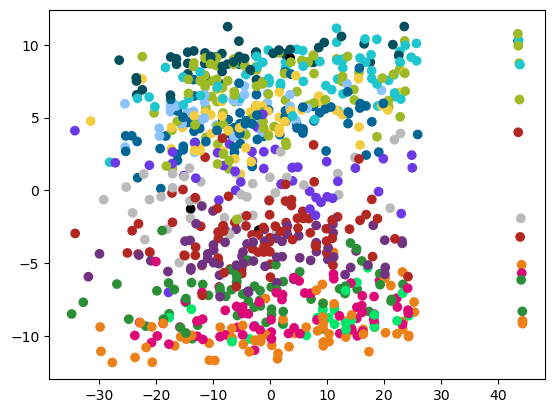

[(0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 

In [125]:
# First we try without scaling
import matplotlib

%matplotlib inline
# viridis = cm.get_cmap('viridis', 14)
# viridis = matplotlib.colormaps["viridis"]
# colors = [viridis(stuff[idx-1]) for idx in y]-
def plot_pca(pca_results):
    colors = [(109,56,229,255),(221,8,120,255),(43,143,56,255),(1,1,1,255),(236,129,25,255),(138,194,254,255),(0,102,151,255),(0,231,107,255),(243,205,65,255),(186,186,186,255),(32,198,206,255),(4,79,93,255),(158,186,39,255),(113,51,129,255),(179,39,34,255)]
    colors = [scale_rgba(x) for x in colors]
    colors = [colors[idx] for idx in y]
    # We reverse the Y axis, to make the partys be placed correctly on their value politics
    plt.scatter(pca_results[:, 0], -1 * pca_results[:, 1], c=colors, alpha=1)
    plt.show()

    print(colors)
# The grouping is not so prevelant
plot_pca(X_decomposed)

In [126]:
X.columns

Index(['530', '531', '533', '534', '535', '537', '538', '540', '541', '543',
       '544', '545', '546', '547', '548', '550', '551', '552', '553', '555',
       '556', '557', '559', '561', '563', '1a', '1b', '2a', '2b', '3a', '3b',
       '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a', '8b', '9a', '9b',
       '10a', '10b', '11a', '11b', '12a', '12b', 'storkreds', 'alder'],
      dtype='object')

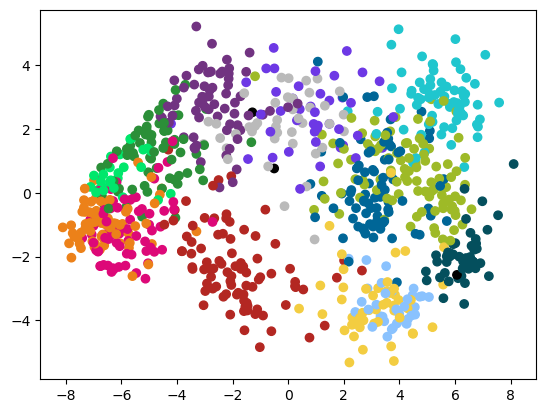

[(0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 

In [127]:
# Now we try with scaled data. We will use Standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X,y = get_X_y(all_data_df)

X_temp = X.drop('storkreds', axis=1, inplace=False)
X_temp[:] = scaler.fit_transform(X_temp[:])
X_temp['storkreds'] = X['storkreds']
X_scaled = onehotencode_and_concat_to_original(X_temp, 'storkreds')
pca = PCA(n_components=0.95)
X_decomposed = pca.fit_transform(X_scaled)

# The grouping is more prevalent now
plot_pca(X_decomposed)

# analysis/description of which questions are most crucial concerning their placement on the axes.

In [128]:
X_pc = X_decomposed

# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns
# get the names
# Map each feature index to their name
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
# Map each most important feature to the PCA they were the most important in. 
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [129]:
df

,0,1
0,PC0,530
1,PC1,10b
2,PC2,534
3,PC3,5b
4,PC4,547
5,PC5,storkreds
6,PC6,storkreds
7,PC7,12a
8,PC8,9b
9,PC9,552


In [130]:
df['feature_names']= df.loc[:,1]
df['principle_component'] = df.loc[:,0]

In [131]:
all_questions_df = pd.DataFrame()

all_ids = pd.concat([dr_questions_df["ID"].apply(lambda x: str(x)),tv2_questions_df['id']], axis=0)
all_questions = pd.concat([dr_questions_df['Question'],tv2_questions_df['question']], axis=0)
all_questions_df['ID'] = all_ids
all_questions_df['Question'] = all_questions
all_questions_df
# all_questions_df = all_questions_df.concat({
#     'ID': all_ids,
#     'Question': all_questions,
# })

,ID,Question
0,530,Danmark skal bruge flere penge på at styrke to...
1,531,Der skal indføres en særlig skat på de allerhø...
2,533,Kriminalitet begået i udsatte boligområder ska...
3,534,På sigt skal Danmark meldes ud af EU
4,535,"Det er fornuftigt, at Danmark i de kommende år..."
...,...,...
69,10b,"Den såkaldte Arne-pension, der giver mulighed ..."
70,11a,Der har været alt for meget fokus på Mette Fre...
71,11b,"Det bør undersøges, om Mette Frederiksen kan s..."
72,12a,"Hvis coronasmitten stiger markant til vinter, ..."


In [132]:
# When we plotted the parties, we used PC0 as the x-axis and PC1 (* -1) as the y-axis.
# The result of the plot looked like similar to plots of political parties where 
# position on the x-axis indicates where the party is placed according to their distribution politics / economics
# while the y-axis indicates where the party is placed according to their value politics / socio-cultural

# Most important question for left-right placement on the political graph
most_important_distribution_politics_placement_question = all_questions_df[all_questions_df["ID"] == df['feature_names'].iloc[0]]['Question'].values[0]

# Most important question for high-low placement on the political graph
most_important_value_politics_placement_question = all_questions_df[all_questions_df["ID"] == df['feature_names'].iloc[1]]['Question'].values[0]

In [133]:
print(f"Most important question for left-right placement: {most_important_distribution_politics_placement_question}")
print(f"Most important question for high-low placement: {most_important_value_politics_placement_question}")

Most important question for left-right placement: Danmark skal bruge flere penge på at styrke tog- og busdrift frem for at bygge nye motorveje
Most important question for high-low placement: Den såkaldte Arne-pension, der giver mulighed for tidligere pension, skal bibeholdes, selvom der er mangel på arbejdskraft.


In [134]:
X

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,1,-2,2,-1,1,-2,1,1,...,1,2,-1,2,1,-2,0,0,Københavns Omegns Storkreds,33
863,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,-1,0,-1,2,2,-2,0,0,Københavns Omegns Storkreds,45
864,1,1,1,-2,2,-1,1,-1,-1,1,...,-1,0,-1,2,2,-2,0,1,Københavns Omegns Storkreds,52
865,1,-1,1,-2,1,-1,-1,-1,-1,1,...,0,0,0,2,1,-2,1,0,Københavns Omegns Storkreds,44


In [135]:
all_data_df['parti']

0                  Moderaterne
1      Socialistisk Folkeparti
2                 Alternativet
3                 Alternativet
4                    Løsgænger
                ...           
862          Socialdemokratiet
863          Socialdemokratiet
864          Socialdemokratiet
865          Socialdemokratiet
866          Socialdemokratiet
Name: parti, Length: 867, dtype: object

# Average positions of parties concering each question

In [136]:
average_q_answer_by_party_df = all_data_df.groupby(['parti']).mean()

In [137]:
average_q_answer_by_party_df

,530,531,533,534,535,537,538,540,541,543,...,8b,9a,9b,10a,10b,11a,11b,12a,12b,alder
parti,,,,,,,,,,,,,,,,,,,,,
Alternativet,1.880597,1.134328,-1.895522,-1.820896,-0.776119,-1.641791,-0.716418,0.283582,1.149254,-1.432836,...,1.134328,-1.477612,0.164179,-0.149254,1.029851,0.164179,0.492537,0.492537,-0.671642,46.000000
Danmarksdemokraterne,-0.837838,-1.378378,1.513514,-0.972973,1.756757,0.189189,-1.864865,1.054054,-1.918919,0.972973,...,0.729730,0.567568,-0.702703,0.918919,1.918919,-1.972973,1.891892,0.486486,0.297297,51.216216
Dansk Folkeparti,-0.571429,-1.081633,1.551020,1.653061,1.551020,0.000000,-1.551020,0.734694,-1.448980,0.510204,...,0.489796,0.816327,-0.306122,0.918367,1.448980,-1.693878,1.795918,0.816327,-0.693878,45.530612
Det Konservative Folkeparti,-0.836735,-1.877551,0.948980,-1.714286,1.816327,1.408163,-1.979592,1.663265,-1.255102,1.397959,...,0.275510,0.500000,-0.295918,1.469388,-1.612245,-1.806122,1.806122,0.765306,-0.295918,42.897959
Enhedslisten,1.959459,1.864865,-1.918919,0.405405,-1.662162,-1.878378,0.418919,-1.797297,1.635135,-1.783784,...,0.445946,-1.824324,0.283784,-1.040541,1.905405,0.702703,-1.162162,-0.554054,0.108108,40.513514
"Frie Grønne, Danmarks Nye Venstrefløjsparti",1.923077,1.923077,-2.000000,-1.692308,-1.769231,-2.000000,-1.769231,-1.461538,1.692308,-1.884615,...,0.538462,-1.692308,0.461538,-0.461538,1.615385,-1.115385,1.346154,0.000000,0.269231,34.807692
Kristendemokraterne,0.880952,-0.666667,-1.285714,-1.595238,1.190476,-0.428571,-1.047619,0.976190,-0.571429,0.071429,...,0.928571,-0.690476,0.357143,0.595238,-1.333333,-0.976190,1.023810,1.023810,-0.309524,49.023810
Liberal Alliance,-1.142857,-1.971429,-0.857143,-1.271429,1.671429,1.900000,-2.000000,1.971429,-1.342857,1.614286,...,-0.214286,1.385714,-0.771429,1.671429,-1.928571,-1.957143,1.871429,1.571429,-1.614286,36.885714
Løsgænger,0.000000,-0.666667,-0.333333,1.000000,0.666667,0.666667,-1.666667,1.333333,2.000000,0.333333,...,-1.000000,0.000000,0.000000,0.333333,0.666667,-0.666667,0.000000,1.666667,-2.000000,48.000000


In [138]:
average_q_answer_by_party_df.index.values

array(['Alternativet', 'Danmarksdemokraterne', 'Dansk Folkeparti',
       'Det Konservative Folkeparti', 'Enhedslisten',
       'Frie Grønne, Danmarks Nye Venstrefløjsparti',
       'Kristendemokraterne', 'Liberal Alliance', 'Løsgænger',
       'Moderaterne', 'Nye Borgerlige', 'Radikale Venstre',
       'Socialdemokratiet', 'Socialistisk Folkeparti', 'Venstre'],
      dtype=object)

In [139]:
# We found the most question that had the most importance in terms of position on the political graph: 
df

,0,1,feature_names,principle_component
0,PC0,530,530,PC0
1,PC1,10b,10b,PC1
2,PC2,534,534,PC2
3,PC3,5b,5b,PC3
4,PC4,547,547,PC4
5,PC5,storkreds,storkreds,PC5
6,PC6,storkreds,storkreds,PC6
7,PC7,12a,12a,PC7
8,PC8,9b,9b,PC8
9,PC9,552,552,PC9


In [140]:
most_important_distribution_politics_question_id = '530'
most_important_value_politics_question_id = '10b'

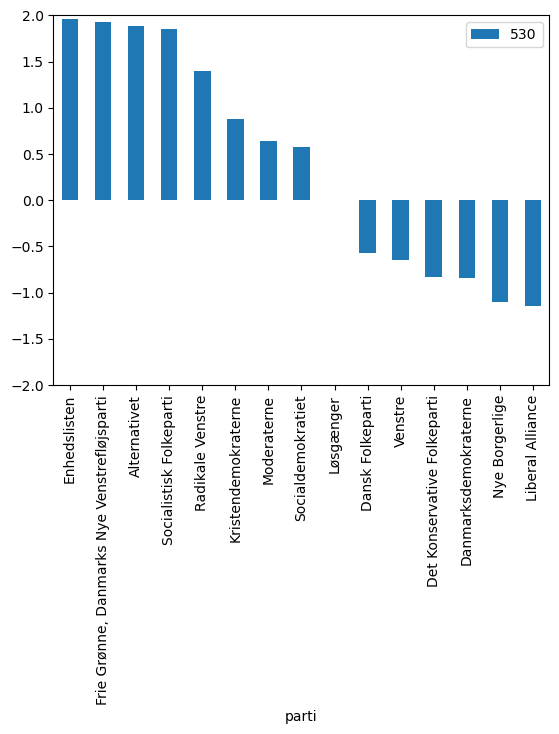

In [141]:
average_q_answer_by_party_df.sort_values(by=most_important_distribution_politics_question_id, axis=0, ascending=False).plot.bar(y=most_important_distribution_politics_question_id, use_index=True)
ax = plt.gca()
ax.set_ylim([-2, 2])
plt.show()

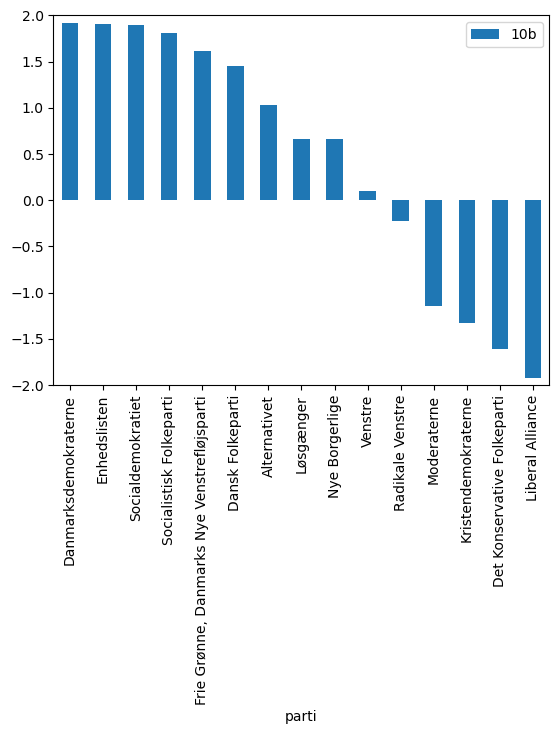

In [142]:
average_q_answer_by_party_df.sort_values(by=most_important_value_politics_question_id, axis=0, ascending=False).plot.bar(y=most_important_value_politics_question_id, use_index=True)
ax = plt.gca()
ax.set_ylim([-2, 2])
plt.show()

# Average age of candidates grouped by parties

<Axes: xlabel='parti'>

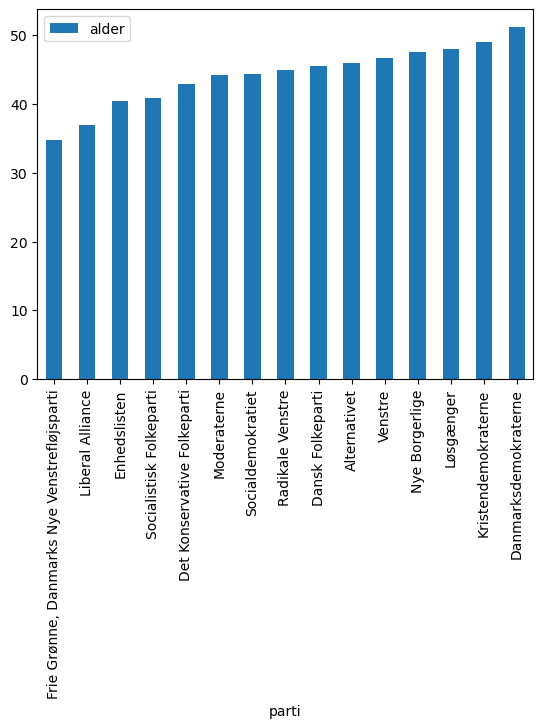

In [143]:
all_data_df.groupby(['parti']).mean().sort_values(by="alder", axis=0).plot.bar(y='alder', use_index=True)

# Overview of most confident candidates

In [144]:
question_columns = ['530', '531', '533', '534', '535', '537', '538', '540', '541', '543',
       '544', '545', '546', '547', '548', '550', '551', '552', '553', '555',
       '556', '557', '559', '561', '563','1a', '1b', '2a',
       '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a',
       '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b',
       ]
all_data_df_copy = all_data_df.copy()
# Absolute since both strongly disagree (-2) and strongly agree should contribute the same to the mean. 
all_data_df_copy[question_columns] = all_data_df_copy[question_columns].apply(lambda x: abs(x))

In [145]:
all_data_df_copy.set_index("navn").transpose()

navn,Lars Philipsen Prahm,Karsten Hønge,Martin Kelleher-Petersen,Nicklas Gjedsig Larsen,Tom Gillesberg,Jan Kristoffersen,Johan Kahl,Thor Clasen Jonasen,Chresten H. Ibsen,Vinni Kjærgaard Jørgensen,...,Stinus Lindgreen,Esat Sentürk,Sebastian Schwartz,Mattias Tesfaye,Kasper Sand Kjær,Maria Gudme,Maria Durhuus,Morten Bødskov,Jeppe Bruus,Gunvor Wibroe
530,1,2,2,2,1,2,1,1,1,1,...,2,2,1,1,1,1,1,1,1,1
531,2,2,1,1,1,1,2,2,1,1,...,2,1,1,1,1,1,2,1,1,1
533,1,1,2,2,2,2,1,2,1,2,...,2,1,1,2,1,1,2,1,1,1
534,2,2,2,1,2,2,2,2,1,2,...,2,2,2,2,2,2,2,2,2,2
535,2,1,1,1,2,1,1,2,2,1,...,2,1,2,2,2,2,1,2,1,1
537,1,2,2,1,1,1,1,2,1,2,...,1,1,1,1,1,1,2,1,1,1
538,2,1,1,1,2,1,2,1,1,2,...,1,1,1,1,1,1,1,1,1,1
540,1,2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2,2,1,1,1
541,1,2,1,1,2,1,1,1,2,1,...,1,1,1,1,1,1,2,1,1,1
543,2,2,1,2,2,1,1,1,1,2,...,1,1,1,1,1,1,2,1,1,1



### Confidence measured in terms of who responded mostly with strongly agree or strongly disagree on average.

In [146]:
print(all_data_df_copy.set_index('navn').drop(columns=['storkreds', 'alder', 'parti'], axis=0).transpose().mean().sort_values(ascending=False).to_frame())

                                   0
navn                                
Sarah Nørris                2.000000
Søren Vanting               2.000000
Mohamed Abdikarim           1.877551
Jan Filbært                 1.857143
Frank Sørensen              1.857143
...                              ...
Kasper Roug                 0.755102
Claus Buch                  0.755102
Thorkild Holmboe-Hay        0.714286
Kenneth Fredslund Petersen  0.714286
Barbara Krarup Hansen       0.591837

[867 rows x 1 columns]


### Intra party disagreements by party

In [147]:
def get_intra_party_agree_disagree_ratio_difference(question_id: str, party: str) -> (float, float):
    all_data_df[[question_id, 'navn', 'parti']].query(f"parti == '{party}'")
    total_responses = all_data_df[[question_id, 'navn', 'parti']].query(f"parti == '{party}'").shape[0]
    agree_count = all_data_df[((all_data_df[question_id] > 0) & (all_data_df['parti'] == party))][[question_id, 'parti', 'navn']].shape[0]
    disagree_count = all_data_df[((all_data_df[question_id] < 0) & (all_data_df['parti'] == party))][[question_id, 'parti', 'navn']].shape[0]
    agree_ratio = agree_count / total_responses
    disagree_ratio = disagree_count / total_responses
    return abs(agree_ratio - disagree_ratio)

In [148]:
all_data_df['parti'].unique()

array(['Moderaterne', 'Socialistisk Folkeparti', 'Alternativet',
       'Løsgænger', 'Enhedslisten', 'Danmarksdemokraterne', 'Venstre',
       'Frie Grønne, Danmarks Nye Venstrefløjsparti', 'Dansk Folkeparti',
       'Kristendemokraterne', 'Liberal Alliance', 'Nye Borgerlige',
       'Det Konservative Folkeparti', 'Radikale Venstre',
       'Socialdemokratiet'], dtype=object)

In [149]:
parties = all_data_df['parti'].unique()
mapping = { }

for question in question_columns:
    for party in parties:
        diff = get_intra_party_agree_disagree_ratio_difference(question, party)
        if party not in mapping:
            mapping[party] = [diff]
        else:
            mapping[party].append(diff)

# 400 members, 200 agree, 200 disagree -> 0 diff 
# 800 members, 700 agree, 100 0disagree -> 300

agreement_score_df = pd.DataFrame()
for party in mapping:
    agreement_score_df[party] = np.array([np.array(mapping[party]).mean()])
# agreement_score_df.sort_values(by="", axis=0, ascending=False)
agreement_score_df.transpose().sort_values(by=0, axis=0, ascending=True)

,0
Løsgænger,0.462585
Moderaterne,0.576288
Kristendemokraterne,0.604956
Venstre,0.615403
Radikale Venstre,0.615900
Socialdemokratiet,0.622332
Alternativet,0.662808
Det Konservative Folkeparti,0.662849
Dansk Folkeparti,0.701791
Liberal Alliance,0.744315


From the dataframe, lower number means they disagree more, since it is the difference i ratio between the members that agree and members that disagree on average across all questions within the party.

"Løsgænger" disagrees the most, which makes sense since they are come from different political parties, but are now only grouped together since they are no longer member of their respective political party. 

After "Løsgænger" does it seem like "Moderaterne" is the party that has the most interal disagreement on average. This can be explained because the political party is a very young central party where their politics might not have been refined yet. The people that join the party can join the party for very different reasons.  

# Classification using Decision Tree, Random Forest and Gradient Boosted Tree

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

print("PCA shape",X_decomposed.shape)
print("all data shape", all_data_df.shape)

# We will use the results from PCA, since it has reduced the amount of features we need to train on
X_train, X_test, y_train, y_test = train_test_split(X_decomposed, y, random_state=42)

hyperparam_grid = {"estimator__max_depth": [x for x in range(6)], "estimator__criterion": ["gini"], "estimator__min_samples_split": [x for x in range(2, 11)]}
# We train with a one-vs-all classifier where we train a classifier for each party
decision_tree_clf = GridSearchCV(estimator=OneVsRestClassifier(DecisionTreeClassifier()), cv=5, param_grid=hyperparam_grid)
decision_tree_clf.fit(X_train, y_train)


PCA shape (867, 38)
all data shape (867, 53)


GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'estimator__criterion': ['gini'],
                         'estimator__max_depth': [0, 1, 2, 3, 4, 5],
                         'estimator__min_samples_split': [2, 3, 4, 5, 6, 7, 8,
                                                          9, 10]})

In [151]:
decision_tree_clf.predict(X_train).shape

(650,)

In [152]:
decision_tree_clf.best_estimator_

OneVsRestClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                     min_samples_split=9))

In [153]:
from sklearn.metrics import precision_score , recall_score

# We notice that the tree is overfitting event though the max_depth is 3 
print(f"Recall on training set: {recall_score(y_train, decision_tree_clf.predict(X_train), average='micro')}")
print(f"Recall on test set: {recall_score(y_test, decision_tree_clf.predict(X_test), average='micro')}")

print(f"Precision on training set: {precision_score(y_train, decision_tree_clf.predict(X_train), average='micro')}")
print(f"Precision on test set: {precision_score(y_test, decision_tree_clf.predict(X_test), average='micro')}")

print(f"Accuracy on training set: {decision_tree_clf.score(X_train, y_train)}")
print(f"Accuracy on test set: {decision_tree_clf.score(X_test, y_test)}")

Recall on training set: 0.8661538461538462
Recall on test set: 0.7096774193548387
Precision on training set: 0.8661538461538462
Precision on test set: 0.7096774193548387
Accuracy on training set: 0.8661538461538462
Accuracy on test set: 0.7096774193548387


In [154]:
from sklearn.ensemble import RandomForestClassifier

# Making 60-20-20 split
X_train, X_test, y_train, y_test = train_test_split(X_decomposed, y, test_size=0.4)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5)

forest_clf = RandomForestClassifier(n_estimators=1000, max_depth=7, min_samples_split=11, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_split=11, n_estimators=1000,
                       random_state=42)

In [155]:
print(f"Recall on training set: {recall_score(y_train, forest_clf.predict(X_train), average='micro')}")
print(f"Recall on validation set: {recall_score(y_validation, forest_clf.predict(X_validation), average='micro')}")

print(f"Precision on training set: {precision_score(y_train, forest_clf.predict(X_train), average='micro')}")
print(f"Precision on validation set: {precision_score(y_validation, forest_clf.predict(X_validation), average='micro')}")

print(f"Accuracy on training set: {forest_clf.score(X_train, y_train)}")
print(f"Accuracy on validation set: {forest_clf.score(X_validation, y_validation)}")

Recall on training set: 0.9923076923076923
Recall on validation set: 0.8786127167630058
Precision on training set: 0.9923076923076923
Precision on validation set: 0.8786127167630058
Accuracy on training set: 0.9923076923076923
Accuracy on validation set: 0.8786127167630058


In [156]:

print(f"Recall on test set: {recall_score(y_test, forest_clf.predict(X_test), average='micro')}")
print(f"Precision on test set: {precision_score(y_test, forest_clf.predict(X_test), average='micro')}")
print(f"Accuracy on test set: {forest_clf.score(X_test, y_test)}")

Recall on test set: 0.8103448275862069
Precision on test set: 0.8103448275862069
Accuracy on test set: 0.8103448275862069


In [157]:
party_to_encoding_map

{'Moderaterne': 0,
 'Socialistisk Folkeparti': 1,
 'Alternativet': 2,
 'Løsgænger': 3,
 'Enhedslisten': 4,
 'Danmarksdemokraterne': 5,
 'Venstre': 6,
 'Frie Grønne, Danmarks Nye Venstrefløjsparti': 7,
 'Dansk Folkeparti': 8,
 'Kristendemokraterne': 9,
 'Liberal Alliance': 10,
 'Nye Borgerlige': 11,
 'Det Konservative Folkeparti': 12,
 'Radikale Venstre': 13,
 'Socialdemokratiet': 14}

In [158]:
predictions = forest_clf.predict(X_decomposed)

In [159]:
for i in range(len(y)):
    actual = y[i]
    pred = predictions[i]
    if actual != pred:
        print(f"Expected: {actual}, got: {pred}")


Expected: 0, got: 12
Expected: 2, got: 4
Expected: 6, got: 5
Expected: 7, got: 2
Expected: 7, got: 2
Expected: 12, got: 10
Expected: 6, got: 12
Expected: 6, got: 10
Expected: 6, got: 12
Expected: 7, got: 2
Expected: 0, got: 12
Expected: 9, got: 2
Expected: 9, got: 0
Expected: 9, got: 13
Expected: 1, got: 4
Expected: 14, got: 2
Expected: 7, got: 2
Expected: 13, got: 2
Expected: 1, got: 14
Expected: 1, got: 2
Expected: 12, got: 10
Expected: 12, got: 6
Expected: 6, got: 12
Expected: 6, got: 12
Expected: 9, got: 0
Expected: 12, got: 10
Expected: 0, got: 6
Expected: 11, got: 8
Expected: 12, got: 6
Expected: 12, got: 10
Expected: 2, got: 1
Expected: 4, got: 2
Expected: 6, got: 11
Expected: 1, got: 14
Expected: 11, got: 8
Expected: 12, got: 10
Expected: 13, got: 10
Expected: 13, got: 2
Expected: 3, got: 8
Expected: 6, got: 10
Expected: 9, got: 14
Expected: 9, got: 0
Expected: 10, got: 12
Expected: 1, got: 2
Expected: 12, got: 6
Expected: 12, got: 10
Expected: 2, got: 4
Expected: 4, got: 1
Exp

In [160]:
from sklearn.ensemble import GradientBoostingClassifier

gboosted_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, min_samples_split=11, max_depth=5)
gboosted_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, min_samples_split=11, n_estimators=200)

In [161]:
print(f"Recall on training set: {recall_score(y_train, gboosted_clf.predict(X_train), average='micro')}")
print(f"Recall on validation set: {recall_score(y_validation, gboosted_clf.predict(X_validation), average='micro')}")

print(f"Precision on training set: {precision_score(y_train, gboosted_clf.predict(X_train), average='micro')}")
print(f"Precision on validation set: {precision_score(y_validation, gboosted_clf.predict(X_validation), average='micro')}")

print(f"Accuracy on training set: {gboosted_clf.score(X_train, y_train)}")
print(f"Accuracy on validation set: {gboosted_clf.score(X_validation, y_validation)}")

Recall on training set: 1.0
Recall on validation set: 0.7630057803468208
Precision on training set: 1.0
Precision on validation set: 0.7630057803468208
Accuracy on training set: 1.0
Accuracy on validation set: 0.7630057803468208


In [162]:
print(f"Recall on test set: {recall_score(y_test, gboosted_clf.predict(X_test), average='micro')}")
print(f"Precision on test set: {precision_score(y_test, gboosted_clf.predict(X_test), average='micro')}")
print(f"Accuracy on test set: {gboosted_clf.score(X_test, y_test)}")

Recall on test set: 0.7068965517241379
Precision on test set: 0.7068965517241379
Accuracy on test set: 0.7068965517241379


# Clustering analysis

In [163]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=14, init='k-means++', random_state=42)
cluster.fit(X_decomposed)

KMeans(n_clusters=14, random_state=42)

In [164]:
cluster_df = pd.DataFrame()

cluster_df['name'] = all_data_df['navn']
cluster_df['party'] = all_data_df['parti']
cluster_df['cluster_number'] = cluster.labels_

In [165]:
cluster.labels_

array([ 3, 11,  0,  2,  3,  0,  3,  0,  4,  0,  0,  0, 11,  0,  0,  0,  0,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 13, 13, 13, 13,  8,  6,
        6,  8,  8,  8, 13,  8,  6,  6,  0,  0, 11,  0,  1,  1,  0,  1,  1,
        1,  1, 10,  3,  3,  3, 10,  3, 10, 10, 10, 10,  8, 10,  7,  7,  7,
        7,  7,  7,  7,  7,  2,  2,  2,  0,  2,  2,  2,  2, 12, 12, 12, 12,
       12, 12,  9,  9, 10,  9,  6,  7,  8,  9,  9,  9,  9,  9,  4,  4,  4,
        4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  0,  0,  0,
        0,  0,  0,  0,  2,  0, 11,  0, 11, 11,  2, 11, 11, 11, 11, 11, 11,
       13, 13,  3,  6,  8,  6,  8,  8,  6,  6,  8,  8,  0,  0, 11,  0,  0,
        0,  0,  1,  1,  3,  3,  1,  1,  3,  3,  4,  3,  3,  4,  4, 10, 10,
        8,  7,  7,  7,  7,  7,  7,  7,  2,  2,  2,  2,  0,  2,  2,  2,  2,
        2,  2,  2, 12, 12, 12,  8,  8,  8,  8,  9,  9,  8,  9,  8,  9,  8,
        4,  9,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  4,  5,  4,  5,
        5,  5,  5,  4,  5

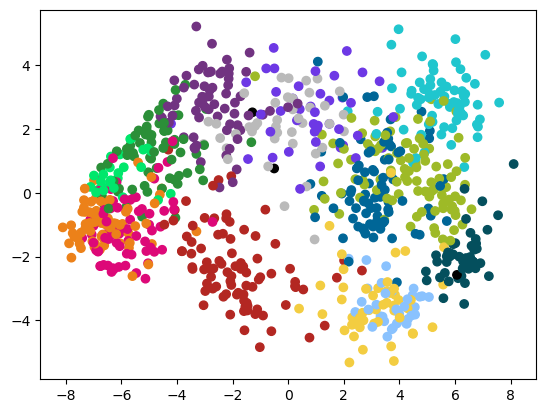

[(0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 

In [166]:
plot_pca(X_decomposed)

In [167]:
party_to_encoding_map

{'Moderaterne': 0,
 'Socialistisk Folkeparti': 1,
 'Alternativet': 2,
 'Løsgænger': 3,
 'Enhedslisten': 4,
 'Danmarksdemokraterne': 5,
 'Venstre': 6,
 'Frie Grønne, Danmarks Nye Venstrefløjsparti': 7,
 'Dansk Folkeparti': 8,
 'Kristendemokraterne': 9,
 'Liberal Alliance': 10,
 'Nye Borgerlige': 11,
 'Det Konservative Folkeparti': 12,
 'Radikale Venstre': 13,
 'Socialdemokratiet': 14}

In [168]:
all_data_df["parti"]

0                  Moderaterne
1      Socialistisk Folkeparti
2                 Alternativet
3                 Alternativet
4                    Løsgænger
                ...           
862          Socialdemokratiet
863          Socialdemokratiet
864          Socialdemokratiet
865          Socialdemokratiet
866          Socialdemokratiet
Name: parti, Length: 867, dtype: object

In [169]:
cluster.predict(X_decomposed).shape

(867,)

In [170]:
party_to_encoding_map

{'Moderaterne': 0,
 'Socialistisk Folkeparti': 1,
 'Alternativet': 2,
 'Løsgænger': 3,
 'Enhedslisten': 4,
 'Danmarksdemokraterne': 5,
 'Venstre': 6,
 'Frie Grønne, Danmarks Nye Venstrefløjsparti': 7,
 'Dansk Folkeparti': 8,
 'Kristendemokraterne': 9,
 'Liberal Alliance': 10,
 'Nye Borgerlige': 11,
 'Det Konservative Folkeparti': 12,
 'Radikale Venstre': 13,
 'Socialdemokratiet': 14}

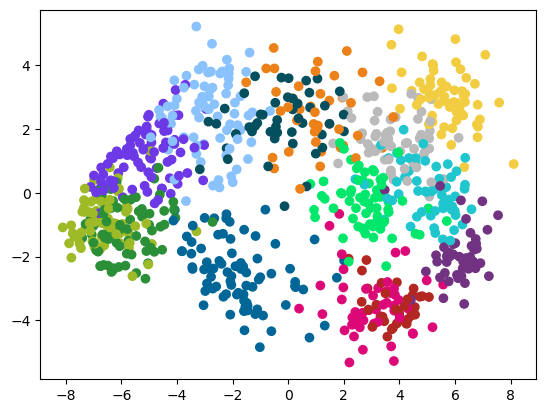

[(0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.6196078431372549, 0.7294117647058823, 0.15294117647058825, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.5411764705882353, 0.7607843137254902, 0.996078431372549, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.6196078431372549, 0.7294117647058823, 0.15294117647058825, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.42745098039215684, 0.2196078431372549, 0.89803

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline

def swap(arr, idx1, idx2):
    tmp = arr[idx1]
    arr[idx1] = arr[idx2]
    arr[idx2] = tmp
    return arr

def plot_cluster_result(pca_results, cluster, title ="", elevation=90, azimuth = -90, roll = 0):
    colors = [(109,56,229,255),(221,8,120,255),(43,143,56,255),(1,1,1,255),(236,129,25,255),(138,194,254,255),(0,102,151,255),(0,231,107,255),(243,205,65,255),(186,186,186,255),(32,198,206,255),(4,79,93,255),(158,186,39,255),(113,51,129,255),(179,39,34,255)]
    colors = [scale_rgba(x) for x in colors]
    colors = [colors[idx + 1 if idx >= 3 else idx ] for idx in cluster(pca_results)]

    plt.scatter(pca_results[:, 0], -1 * pca_results[:, 1], c=colors, alpha=1)

    plt.title(title)
    plt.show()


    print(colors)
plot_cluster_result(X_decomposed,cluster.predict)


# There is quite a lot of overlap, so it would seem like it would make sense to have fewer parties

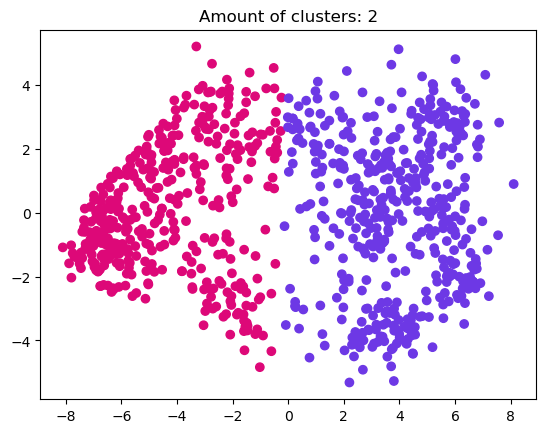

[(0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901

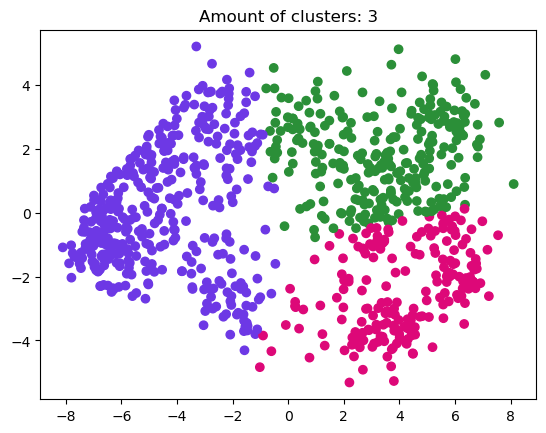

[(0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.42745098039215684, 0.2196078431372549, 0.898

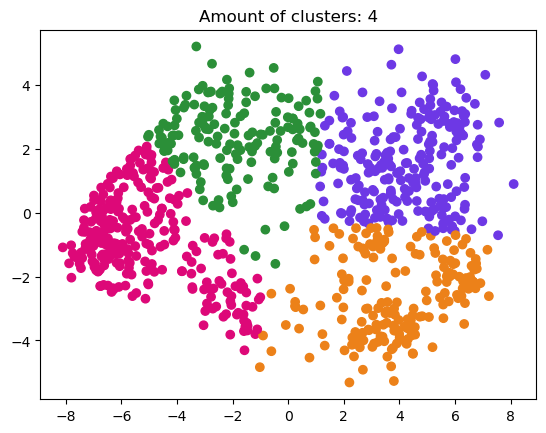

[(0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784

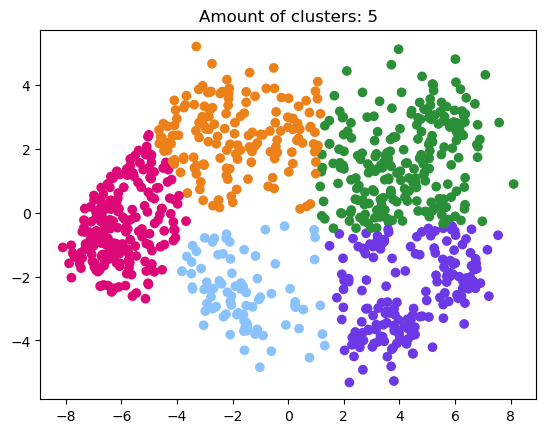

[(0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784

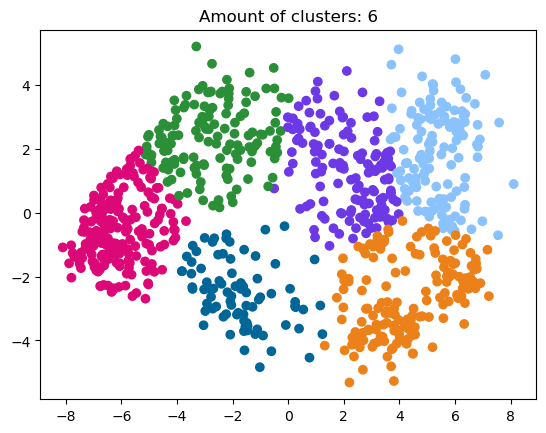

[(0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784

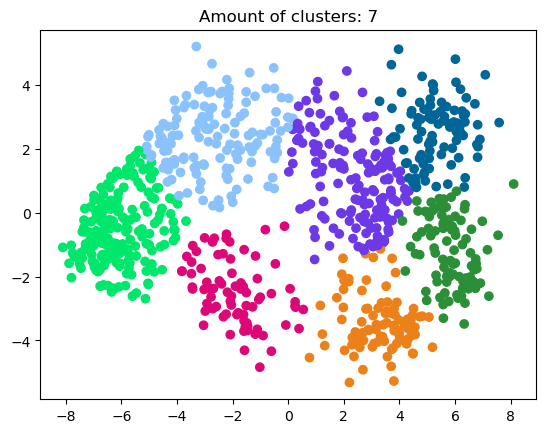

[(0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.0, 0.9058823529411765, 0.4196078431372549, 1.0), (0.0, 0.9058823529411765, 0.4196078431372549, 1.0), (0.0, 0.9058823529411765, 0.4196078431372549, 1.0), (0.5411764705882353, 0.7607843137254902, 0.996078431372549, 1.0), (0.5411764705882353, 0.7607843137254902, 0.996078431372549, 1.0), (0.5411764705882353, 0.7607843137254902, 0.996078431372549, 1.0), (0.5411764705882353, 0.7607843137254902, 0.996078431372549, 1.0), (0.5411764705882353, 0.7607843137254902, 0.996078431372549, 1.0), (0.0, 0.9058823529411765, 0.4196078431372549, 1.0), (0.0, 0.9058823529411765, 0.4196078431372549, 1.0), (0.5411764705882353, 0.7607843137254902, 0.996078431372549, 1.0), (0.0, 0.9058823529411765, 0.4196078431372549, 1.0), (0.0, 0.9058823529411765, 0.4196078431372549, 1.0), (0.0, 0.9058823529411765, 0.4196078431372549, 1.0), (0.0, 0.9058823529411765, 0.4196078431372549, 1.0), (0.5411764705882353, 0.7607843137254902, 0.996078431372549, 1.0), (

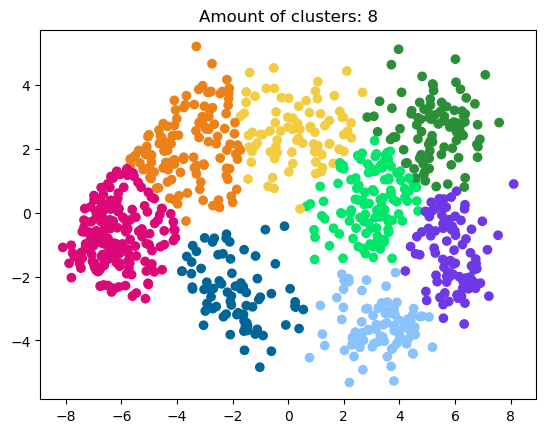

[(0.0, 0.9058823529411765, 0.4196078431372549, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.9529411764705882, 0.803921568627451, 0.2549019607843137, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.9529411764705882, 0.803921568627451, 0.2549019607843137, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.9529411764705882, 0.803921568627451, 0.2549019607843137, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0

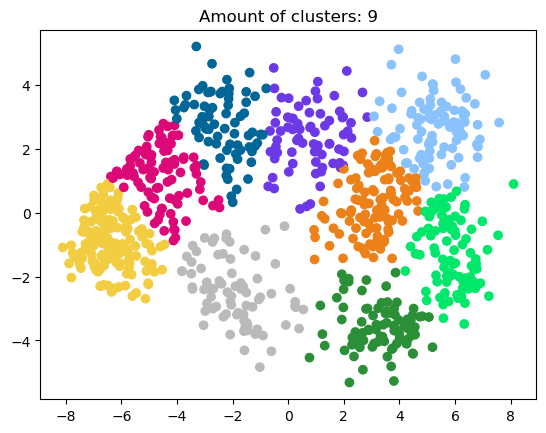

[(0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.9529411764705882, 0.803921568627451, 0.2549019607843137, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.0, 0.4, 0.592156862745098, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.0, 0.4, 0.592156862745098, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.9529411764705882, 0.803921568627451, 0.2549019607843137, 1.0), (0.9529411764705882, 0.803921568627451, 0.2549019607843137, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 

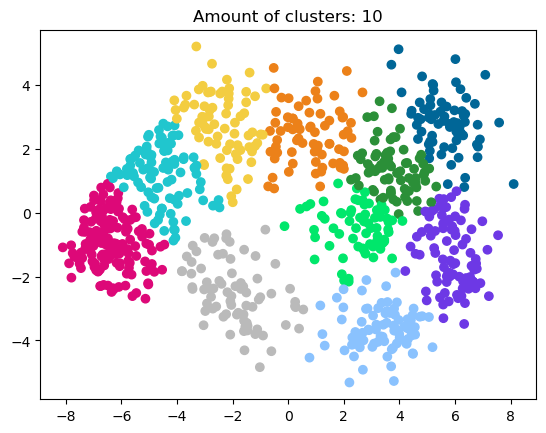

[(0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.12549019607843137, 0.7764705882352941, 0.807843137254902, 1.0), (0.12549019607843137, 0.7764705882352941, 0.807843137254902, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.9529411764705882, 0.803921568627451, 0.2549019607843137, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.12549019607843137, 0.7764705882352941, 0.807843137254902, 1.0), (0.9529411764705882, 0.803921568627451, 0.2549019607843137, 1.0), (0.12549019607843137, 0.7764705882352941, 0.807843137254902, 1.0), (0.12549019607843137, 0.7764705882352941, 0.807843137254902, 1.0), (0.12549019607843137, 0.7764705882352941, 0.807843137254902, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.12549019607843137, 0.7764705882352941, 0.8078431372

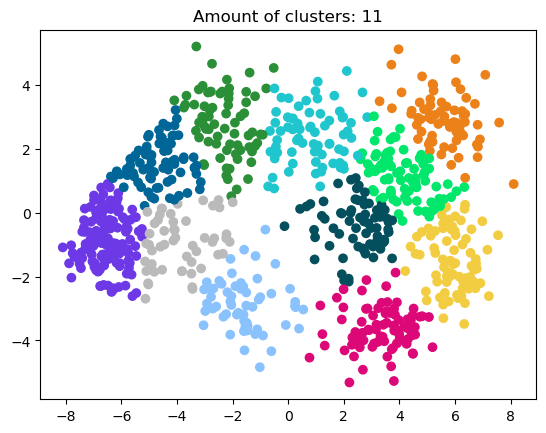

[(0.0, 0.9058823529411765, 0.4196078431372549, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.0, 0.4, 0.592156862745098, 1.0), (0.7294117647058823, 0.7294117647058823, 0.7294117647058823, 1.0), (0.12549019607843137, 0.7764705882352941, 0.807843137254902, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.0, 0.4, 0.592156862745098, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.0, 0.4, 0.592156862745098, 1.0), (0.0, 0.4, 0.592156862745098, 1.0), (0.0, 0.4, 0.592156862745098, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.0, 0.4, 0.592156862745098, 1.0), (0.7294117647058823, 0.7294117647058823, 0.7294117647058823, 1.0), (0.0, 0.4, 0.592156862745098, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.427450980392156

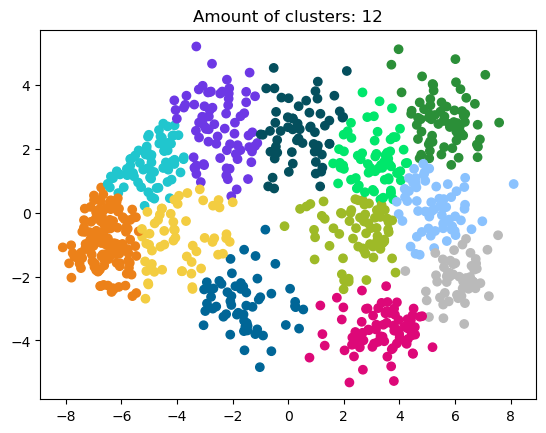

[(0.0, 0.9058823529411765, 0.4196078431372549, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.12549019607843137, 0.7764705882352941, 0.807843137254902, 1.0), (0.9529411764705882, 0.803921568627451, 0.2549019607843137, 1.0), (0.01568627450980392, 0.30980392156862746, 0.36470588235294116, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.01568627450980392, 0.30980392156862746, 0.36470588235294116, 1.0), (0.12549019607843137, 0.7764705882352941, 0.807843137254902, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.12549019607843137, 0.7764705882352941, 0.807843137254902, 1.0), (0.12549019607843137, 0.7764705882352941, 0.807843137254902, 1.0), (0.12549019607843137, 0.7764705882352941, 0.807843137254902, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.12549019607843137, 0.7764705882352941, 0.807843137254902, 1.0),

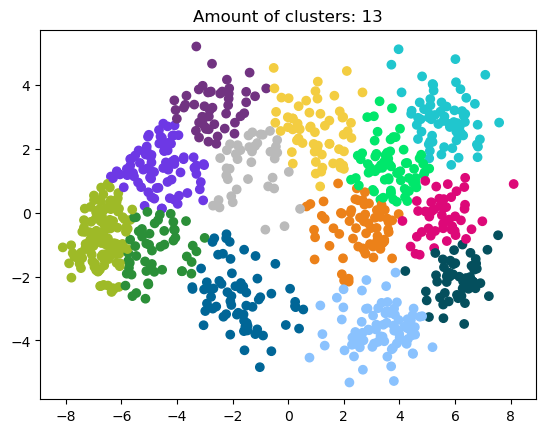

[(0.0, 0.9058823529411765, 0.4196078431372549, 1.0), (0.6196078431372549, 0.7294117647058823, 0.15294117647058825, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.7294117647058823, 0.7294117647058823, 0.7294117647058823, 1.0), (0.44313725490196076, 0.2, 0.5058823529411764, 1.0), (0.9529411764705882, 0.803921568627451, 0.2549019607843137, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.7294117647058823, 0.7294117647058823, 0.7294117647058823, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.6196078431372549, 0.7294117647058823, 0.15294117647058825, 1.0), (0.6196078431372549, 0.7294117647058823, 0.15294117647058825, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.42745098039

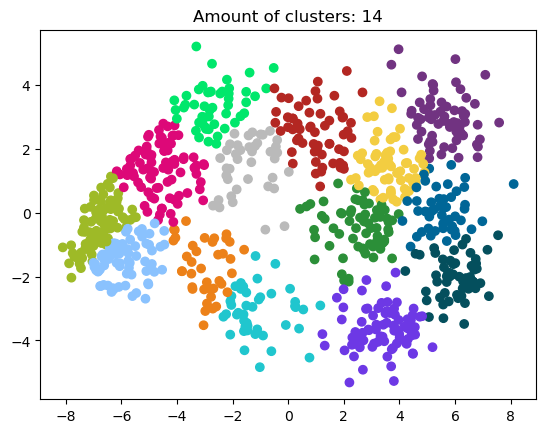

[(0.9529411764705882, 0.803921568627451, 0.2549019607843137, 1.0), (0.5411764705882353, 0.7607843137254902, 0.996078431372549, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.9254901960784314, 0.5058823529411764, 0.09803921568627451, 1.0), (0.7294117647058823, 0.7294117647058823, 0.7294117647058823, 1.0), (0.0, 0.9058823529411765, 0.4196078431372549, 1.0), (0.0, 0.9058823529411765, 0.4196078431372549, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.7294117647058823, 0.7294117647058823, 0.7294117647058823, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.6196078431372549, 0.7294117647058823, 0.15294117647058825, 1.0), (0.6196078431372549, 0.7294117647058823, 0.15294117647058825, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.86666666

In [172]:
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
# To determine the optimal amount of clusters/political parties, we will perform clustering on different cluster sizes. 
# For each cluster size, we will calculate the inter cluster sum of squared distances and then use the elbow method. 
# In addition we will also use the averge silhouette score, since it tells us far away the clusters are from each other.
X_best_pcas = X_decomposed[:,:2]
n_clusters = [x for x in range(2, 15)]

cluster_wss_results = []
cluster_silhouette_results = []

for n in n_clusters:
    cluster = KMeans(n_clusters=n, random_state=42)
    cluster.fit(X_best_pcas)
    plot_cluster_result(X_best_pcas, cluster.predict, title = f"Amount of clusters: {str(n)}")
    cluster_wss_results.append(cluster.inertia_)
    silhouette_avg = silhouette_score(X_best_pcas, cluster.labels_)
    cluster_silhouette_results.append(silhouette_avg)

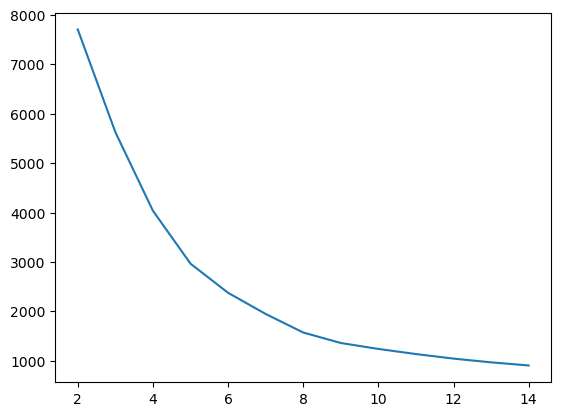

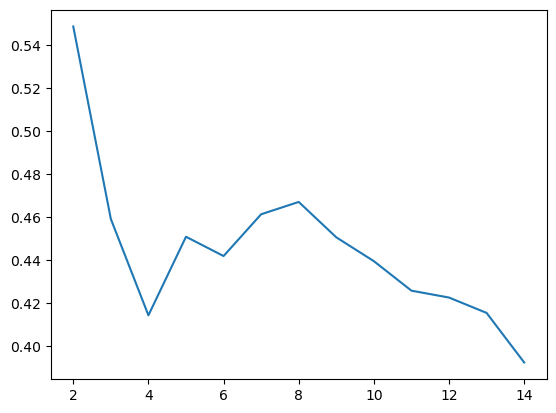

In [173]:
plt.plot(n_clusters, cluster_wss_results)
plt.show()

plt.plot(n_clusters, cluster_silhouette_results)
plt.show()


Using the elbow method, there should be around 4-5 political parties (could also argue maybe 6-7 parties, since the transition is very soft). This would make sense, since we have 4 quadrants the parties can placed within (in a 2d visualization)

Between 4 and 5, it would seem like 5 is optimal, since the silhouette score is higher, thus the distance between the clusters on average is higher, which indicates higher quality clusters.

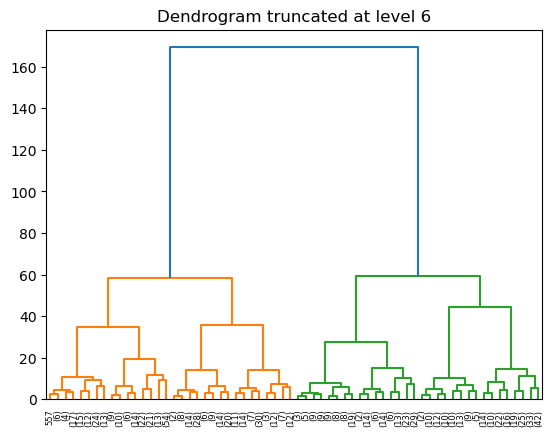

In [174]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Doing the same but with a bottom-up Hierarchical clustering algortihm
# We will use dendogram to determine optimal number of clusters
def plot_dendrogram(model, title="", **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    plt.title(title)
    plt.show()

cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None,)
cluster.fit(X_best_pcas)
p = 5
plot_dendrogram(cluster , title = f"Dendrogram truncated at level {p+1}", truncate_mode="level", p=p)

From the dendrogram it would seem like 2 is the optimal amount of clusters, since it has the highest vertical distance. If we draw a horizontal line through, it would only cross two lines. 

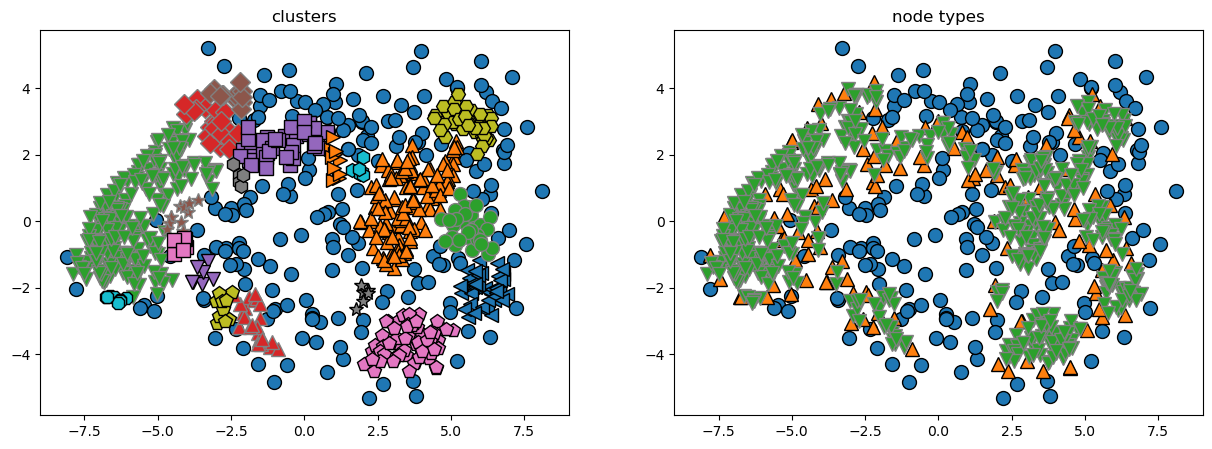

In [175]:
import mglearn
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X_best_pcas = X_decomposed[:,:2]

dbscan=DBSCAN(eps=0.4,min_samples=5).fit(X_best_pcas)
fig,axes = plt.subplots(1,2,figsize=(15,5))

types=np.zeros(X_best_pcas.shape[0])
types[np.isin(np.arange(0,X_best_pcas.shape[0]),dbscan.core_sample_indices_)]=1
types[dbscan.labels_ == -1]= -1

mglearn.discrete_scatter(X_best_pcas[:,0], -1 * X_best_pcas[:,1],dbscan.labels_,ax=axes[0])
mglearn.discrete_scatter(X_best_pcas[:,0], -1 * X_best_pcas[:,1],types,ax=axes[1])
axes[0].set_title('clusters')
axes[1].set_title('node types')
plt.show()

In [176]:
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 19
Estimated number of noise points: 185


DBSCAN is sems bad at detecting clusters in this instance.
Looking at the alogoritme af DBSCANE this makes sens as all the data poitns are very close, and there is no large seperation between clusters in the dataset. Meaning if the ESP is to high the chance of circels overlapping is high, this will alow the algorthm to find a path trough most af the datapoints creating big clusters. If the Esp is lowers there is a big chance of creating noise as, some individual datapointst do have a conciderebal distance to cluster centers.  

# Overview of political landscape

In [177]:
elected_candidates_responses_df

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
1,2,2,-2,-2,-2,-2,2,2,2,-2,...,-2,0,-2,2,1,1,0,-2,Østjyllands Storkreds,58
2,2,2,-2,-1,-1,-1,1,-2,2,-2,...,-2,0,-1,2,0,-2,-1,1,Østjyllands Storkreds,30
3,-1,-1,2,-1,2,-1,-2,1,-2,1,...,-1,-1,0,2,-2,2,0,0,Østjyllands Storkreds,53
4,-1,-1,1,-2,2,1,-2,1,-2,1,...,-1,0,1,1,-2,2,1,-1,Østjyllands Storkreds,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,1,1,2,-2,2,-1,1,-1,-1,1,...,0,-1,1,2,1,-2,1,0,Københavns Omegns Storkreds,41
165,1,1,1,-2,2,-1,1,-1,-1,1,...,-1,0,-1,2,1,-2,1,1,Københavns Omegns Storkreds,33
166,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,-1,0,-1,2,2,-2,0,0,Københavns Omegns Storkreds,45
167,1,1,1,-2,2,-1,1,-1,-1,1,...,-1,0,-1,2,2,-2,0,1,Københavns Omegns Storkreds,52


In [178]:
elected_candidates_responses_df['530'].iloc[0]

2

In [179]:
from dataclasses import dataclass

@dataclass
class Disagreement:
    person1: int
    person2: int
    disagree_count: int
    disagreement_level_sum: int
    avg_disagreement_level: int


def response_on_question(person_idx, question,data) -> int:
    return data[question].iloc[person_idx]

def agrees(person1: int, person2:int, question,data) -> bool:
    return (response_on_question(person1, question,data) > 0 and response_on_question(person2, question,data) > 0) or (response_on_question(person1, question,data) < 0 and response_on_question(person2, question,data) < 0)

def create_compare_question_key(person1: int, person2: int, question: str):
    sorted_idx = sorted([person1, person2])
    p1_idx = sorted_idx[0]
    p2_idx = sorted_idx[1]
    return f"Q_{question}_P1({p1_idx}_P2({p2_idx}))"

def create_compare_key(person1: int, person2: int):
    sorted_idx = sorted([person1, person2])
    p1_idx = sorted_idx[0]
    p2_idx = sorted_idx[1]
    return f"P1({p1_idx}_P2({p2_idx}))"

def get_disagreement_level(person1: int, person2:int, question, data) -> int:
    return abs(abs(response_on_question(person1, question, data)) + abs(response_on_question(person2, question, data)))


def update_disagreement(disagreement: Disagreement, disagreement_level:int):
    disagreement.disagree_count +=1
    disagreement.disagreement_level_sum += disagreement_level
    disagreement.avg_disagreement_level = disagreement.disagreement_level_sum / disagreement.disagree_count
    return disagreement



def get_disagreement_df(data: pd.DataFrame, question_columns):
    disagreements = {}
    has_been_compared = set()

    for person_idx in data.index.values:
        for question in question_columns: 
            for other_person_idx in data.index.values:
                if other_person_idx == person_idx:
                    continue
                if agrees(person_idx, other_person_idx, question, data):
                    continue

                qk = create_compare_question_key(person_idx,other_person_idx, question)
                if qk in has_been_compared:
                    continue
                has_been_compared.add(qk)
                disagreement_level = get_disagreement_level(person_idx, other_person_idx, question, data)

                k = create_compare_key(person_idx, other_person_idx)
                if not k in disagreements:
                    disagreements[k] = Disagreement(person_idx, other_person_idx, 1, disagreement_level, disagreement_level)
                    continue

                updated_disagreement = update_disagreement(disagreements[k], disagreement_level)
                disagreements[k] = updated_disagreement

    disagreement_df = pd.DataFrame()
    p1 = []
    p1_names = []
    p1_parties = []
    p2 = []
    p2_names = []
    p2_parties = []
    avg_disagreement = []

    for disagreement_key in disagreements: 
        disagreement = disagreements[disagreement_key]
        p1.append(disagreement.person1)
        p1_names.append(data.iloc[disagreement.person1]['navn'])
        p1_parties.append(data.iloc[disagreement.person1]['parti'])
        p2.append(disagreement.person2)
        p2_names.append(data.iloc[disagreement.person2]['navn'])
        p2_parties.append(data.iloc[disagreement.person2]['parti'])
        avg_disagreement.append(disagreement.avg_disagreement_level)

    disagreement_df['p1'] = pd.Series(p1)
    disagreement_df['p1_name'] = pd.Series(p1_names)
    disagreement_df['p1_party'] = pd.Series(p1_parties)
    disagreement_df['p2'] = pd.Series(p2)
    disagreement_df['p2_name'] = pd.Series(p2_names)
    disagreement_df['p2_party'] = pd.Series(p2_parties)
    disagreement_df['avg_disagreement'] = pd.Series(avg_disagreement)
    return disagreement_df

In [180]:
disagreement_df = get_disagreement_df(elected_candidates_responses_df, question_columns)

,p1,p1_name,p1_party,p2,p2_name,p2_party,avg_disagreement
0,0,Karsten Hønge,Socialistisk Folkeparti,3,Hans Kristian Skibby,Danmarksdemokraterne,2.545455
1,0,Karsten Hønge,Socialistisk Folkeparti,4,Troels Lund Poulsen,Venstre,2.457143
2,0,Karsten Hønge,Socialistisk Folkeparti,5,Michael Aastrup Jensen,Venstre,2.542857
3,0,Karsten Hønge,Socialistisk Folkeparti,6,Jakob Ellemann-Jensen,Venstre,2.333333
4,0,Karsten Hønge,Socialistisk Folkeparti,7,Nick Zimmermann,Dansk Folkeparti,2.903226
...,...,...,...,...,...,...,...
14191,165,Kasper Sand Kjær,Socialdemokratiet,168,Jeppe Bruus,Socialdemokratiet,1.000000
14192,165,Kasper Sand Kjær,Socialdemokratiet,167,Morten Bødskov,Socialdemokratiet,1.400000
14193,166,Maria Durhuus,Socialdemokratiet,167,Morten Bødskov,Socialdemokratiet,2.052632
14194,166,Maria Durhuus,Socialdemokratiet,168,Jeppe Bruus,Socialdemokratiet,1.500000


In [181]:
disagreement_df.sort_values(by="avg_disagreement", axis=0, ascending=False)

,p1,p1_name,p1_party,p2,p2_name,p2_party,avg_disagreement
2479,15,Charlotte Broman Mølbæk,Socialistisk Folkeparti,126,Lars-Christian Brask,Liberal Alliance,3.607143
12927,118,Trine Pertou Mach,Enhedslisten,126,Lars-Christian Brask,Liberal Alliance,3.545455
12938,118,Trine Pertou Mach,Enhedslisten,145,Steffen Frølund,Liberal Alliance,3.527778
4103,26,Franciska Rosenkilde,Alternativet,126,Lars-Christian Brask,Liberal Alliance,3.520000
1166,7,Nick Zimmermann,Dansk Folkeparti,26,Franciska Rosenkilde,Alternativet,3.520000
...,...,...,...,...,...,...,...
7055,48,Kristian Bøgsted,Danmarksdemokraterne,120,Susie Jessen,Danmarksdemokraterne,0.250000
10366,80,Trine Bramsen,Socialdemokratiet,150,Rasmus Stoklund,Socialdemokratiet,0.250000
1154,6,Jakob Ellemann-Jensen,Venstre,156,Karen Ellemann,Venstre,0.200000
12425,108,Pernille Vermund,Nye Borgerlige,130,Peter Seier Christensen,Nye Borgerlige,0.000000


The elected members that disagee the most are Charlotte Mølbæk from SF and Lars-Christian Brask from LA, which makes sense, since the parties they belong to are in the opposite corners of the political graph.  

### Finding members highest diasgreement within each party

In [191]:
all_parties = elected_candidates_responses_df['parti'].unique()
for party in all_parties:
    print(f'Highest disagreement across all questions in party {party}')
    inter_party_disagreement_df = disagreement_df[(disagreement_df['p1_party'] == party) & (disagreement_df['p2_party'] == party)]
    inter_party_disagreement_df = inter_party_disagreement_df.sort_values(by = "avg_disagreement", axis=0, ascending=False)
    highest_disagreement_row = inter_party_disagreement_df.iloc[0]
    print(f'{highest_disagreement_row["p1_name"]} and {highest_disagreement_row["p2_name"]} --- {highest_disagreement_row["avg_disagreement"]}\n')

Highest disagreement across all questions in party Socialistisk Folkeparti
Charlotte Broman Mølbæk and Pia Olsen Dyhr --- 2.125

Highest disagreement across all questions in party Alternativet
Christina Sade Olumeko and Franciska Rosenkilde --- 2.5

Highest disagreement across all questions in party Enhedslisten
Rosa Lund and Trine Pertou Mach --- 1.8

Highest disagreement across all questions in party Danmarksdemokraterne
Søren Espersen and Charlotte Munch --- 1.894736842105263

Highest disagreement across all questions in party Venstre
Michael Aastrup Jensen and Jan E. Jørgensen --- 2.090909090909091

Highest disagreement across all questions in party Dansk Folkeparti
Nick Zimmermann and Peter Kofod --- 2.3333333333333335

Highest disagreement across all questions in party Moderaterne
Jon Læssøe Stephensen and Kristian Klarskov --- 2.5238095238095237

Highest disagreement across all questions in party Liberal Alliance
Lars-Christian Brask and Sandra Elisabeth Skalvig --- 3.1666666666

### Finding members that disagree the most when comparing each party with each other one-by-one

In [199]:
comparison_df = pd.DataFrame()

p1_names = []
p2_names = []
p1_parties = []
p2_parties = []
avg_disagreements = []

all_parties = elected_candidates_responses_df['parti'].unique()
for party in all_parties:
    for other_party in all_parties:
        if party == other_party: continue
        # print(f'Highest disagreement across all questions when comparing {party} with {other_party}')
        inter_party_disagreement_df = disagreement_df[(disagreement_df['p1_party'] == party) & (disagreement_df['p2_party'] == other_party)]
        inter_party_disagreement_df = inter_party_disagreement_df.sort_values(by = "avg_disagreement", axis=0, ascending=False)
        highest_disagreement_row = inter_party_disagreement_df.iloc[0]
        p1_names.append(highest_disagreement_row['p1_name'])
        p1_parties.append(highest_disagreement_row['p1_party'])
        p2_names.append(highest_disagreement_row['p2_name'])
        p2_parties.append(highest_disagreement_row['p2_party'])
        avg_disagreements.append(highest_disagreement_row['avg_disagreement'])
        # print(f'{highest_disagreement_row["p1_name"]} and {highest_disagreement_row["p2_name"]} --- {highest_disagreement_row["avg_disagreement"]}\n')
comparison_df['p1_name'] = pd.Series(p1_names)
comparison_df['p1_parties'] = pd.Series(p1_parties)
comparison_df['p2_name'] = pd.Series(p2_names)
comparison_df['p2_parties'] = pd.Series(p2_parties)
comparison_df['avg_disagreement'] = pd.Series(avg_disagreements)
comparison_df.sort_values(by="avg_disagreement", axis=0, ascending=False)

,p1_name,p1_parties,p2_name,p2_parties,avg_disagreement
6,Charlotte Broman Mølbæk,Socialistisk Folkeparti,Lars-Christian Brask,Liberal Alliance,3.607143
28,Trine Pertou Mach,Enhedslisten,Lars-Christian Brask,Liberal Alliance,3.545455
17,Franciska Rosenkilde,Alternativet,Lars-Christian Brask,Liberal Alliance,3.520000
56,Nick Zimmermann,Dansk Folkeparti,Franciska Rosenkilde,Alternativet,3.520000
57,Nick Zimmermann,Dansk Folkeparti,Trine Pertou Mach,Enhedslisten,3.481481
...,...,...,...,...,...
23,Peder Hvelplund,Enhedslisten,Sascha Faxe,Alternativet,2.333333
93,Kim Edberg,Nye Borgerlige,Morten Messerschmidt,Dansk Folkeparti,2.307692
1,Pia Olsen Dyhr,Socialistisk Folkeparti,Trine Pertou Mach,Enhedslisten,2.200000
22,Rosa Lund,Enhedslisten,Pia Olsen Dyhr,Socialistisk Folkeparti,2.153846
